In [1]:
from array import array
import matplotlib.pyplot as plt

In [2]:
def fderiv(y,t,deriv):
    deriv[0] = 2.0*t*y[0]*y[0]
    #deriv[0] = a*math.pow(math.sin(t),2)*y[0]

In [3]:
def yexact(t):
    return 1.0/(1.0-t*t)
    #return 2*param[0]*math.exp(0.5*(t - math.sin(t)*math.cos(t)))

In [4]:
def euler(y,nY,t,tau,deriv):
    F1 = array('d')
    
    for i in range(0,nY):
        F1.append(0.0)
    
    fderiv(y,t,F1)
    
    for i in range(0,nY):
        y[i] = y[i] + tau*F1[i]

In [5]:
def rk2(y,nY,t,tau,deriv):
    F1 = array('d')
    F2 = array('d')
    ytemp = array('d')
    
    for i in range(0,nY):
        F1.append(0.0)
        F2.append(0.0)
        ytemp.append(0.0)
    
    fderiv(y,t,F1)
    
    half_tau = 0.5*tau
    t_half = t + half_tau
    
    for i in range(0,nY):
        ytemp[i]=y[i]+half_tau*F1[i]
        
    fderiv(ytemp,t_half,F2)
        
    for i in range(0,nY):
        y[i] = y[i] + tau*F2[i]

In [6]:
def rk4(y,nY,t,tau,deriv):
    F1 = array('d')
    F2 = array('d')
    F3 = array('d')
    F4 = array('d')
    ytemp = array('d')
    
    for i in range(0,nY):
        F1.append(0.0)
        F2.append(0.0)
        F3.append(0.0)
        F4.append(0.0)
        ytemp.append(0.0)
        
    fderiv(y,t,F1)
    
    half_tau = 0.5*tau
    t_half = t + half_tau
    
    for i in range(0,nY):
        ytemp[i] = y[i] + half_tau*F1[i]
        
    fderiv(ytemp,t_half,F2)
    
    for i in range(0,nY):
        ytemp[i] = y[i] + half_tau*F2[i]
        
    fderiv(ytemp,t_half,F3)
    
    t_full = t + tau

    for i in range(0,nY):
        ytemp[i] = y[i] + tau*F3[i]
        
    fderiv(ytemp,t_full,F4)
    
    for i in range(0,nY):
        y[i] = y[i] + tau/6.0*(F1[i]+F4[i]+2.0*(F2[i]+F3[i]))

0.9998999999999987 0.9999000000000039 0.9998999999999987 0.9998999999999987
0.0 0.0 0.0 0.0
101 202 101 101
18.2496881810635 30.699698397719544 92.1346864379206 392.93285158172694
1.0 1.0 1.0 1.0
101 202 101 101
392.93285158172694 92.1346864379206 30.699698397719544 18.2496881810635 5000.250012507984 5000.250012507984
0.9998999999999987 0.9998999999999987 0.9999000000000039 0.9998999999999987 0.9999000000000001 0.9999000000000001
0.9999000000000396 0.9999000000000465 0.9999000000000396 0.9999000000000396
0.0 0.0 0.0 0.0
2001 4002 2001 2001
190.13353012323623 332.0926558325291 1426.9198668483791 3818.1574836324257
1.0 1.0 1.0 1.0
2001 4002 2001 2001
3818.1574836324257 1426.9198668483791 332.0926558325291 190.13353012323623 5000.250012502432 5000.250012502432
0.9999000000000396 0.9999000000000396 0.9999000000000465 0.9999000000000396 0.9999 0.9999
0.9998999999999508 0.9999000000002242 0.9998999999999508 0.9998999999999508
0.0 0.0 0.0 0.0
5001 10002 5001 5001
396.68939501398205 680.383069

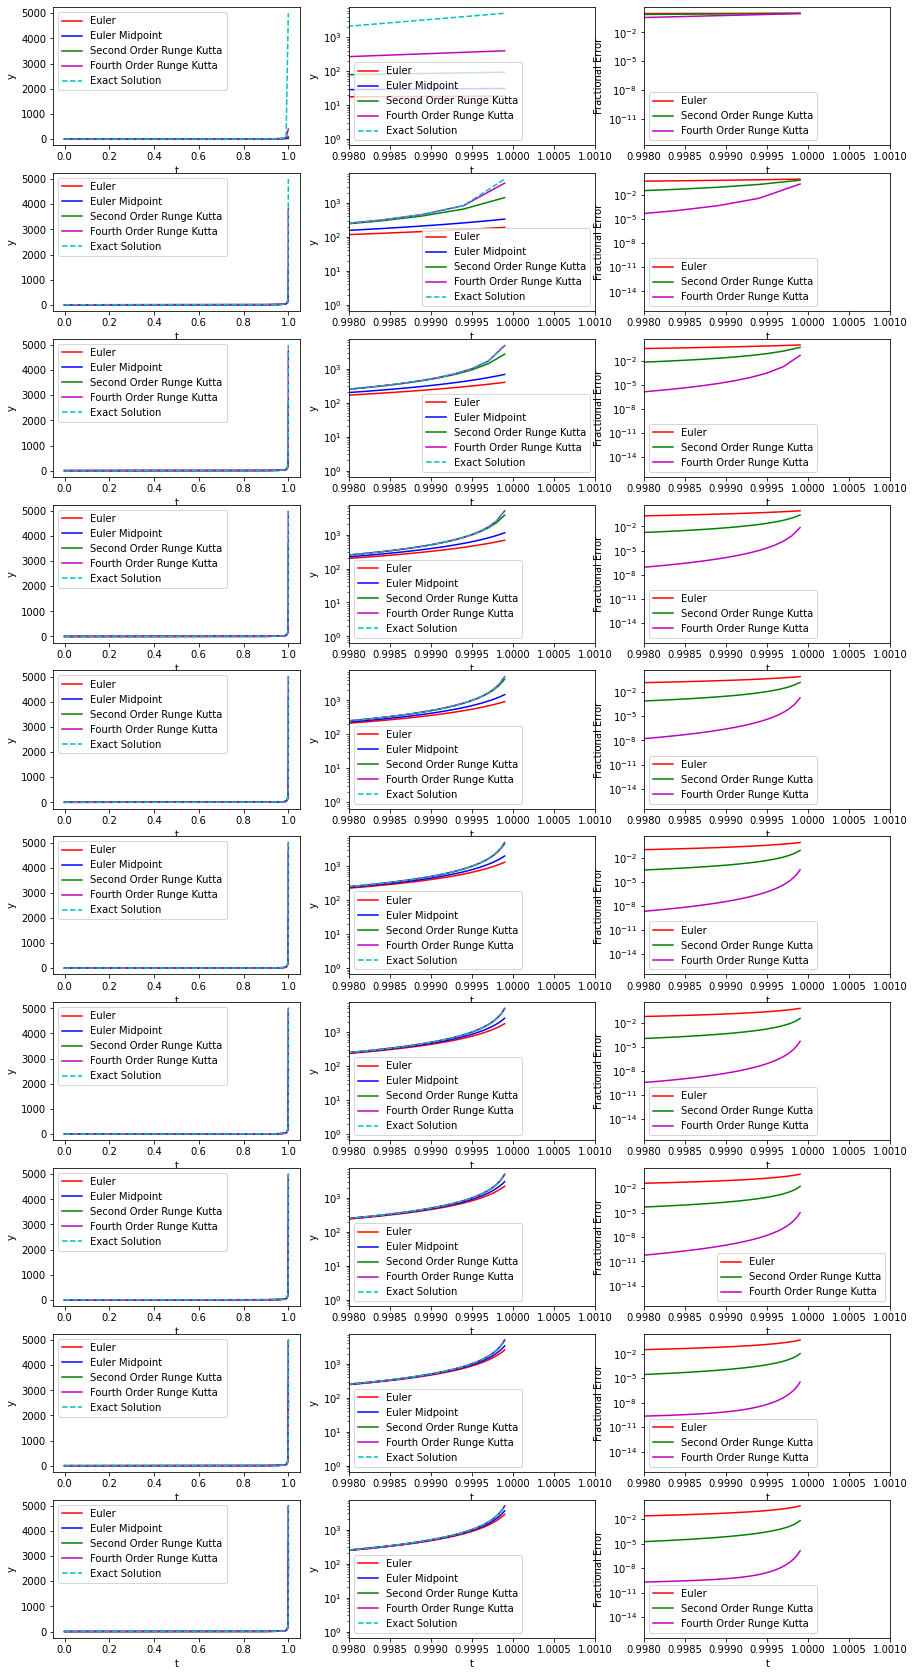

In [71]:
# Wikipedia page y' = (sin(t))^2*y

fig, axs = plt.subplots(10, 3,figsize=(15,30))

Steps = np.zeros(10)
Steps[0] = 100
Steps[1] = 2000
Steps[2] = 5000
Steps[3] = 10000
Steps[4] = 15000
Steps[5] = 25000
Steps[6] = 40000
Steps[7] = 60000
Steps[8] = 80000
Steps[9] = 100000

e1 = np.zeros(10)
e2 = np.zeros(10)
e3 = np.zeros(10)
e4 = np.zeros(10)

for istep in range(10):
    
    nStep = int(Steps[istep])
    a = 0.9999
    tau = a/nStep

    # Everything below this point is calculated.
    y0 = 1.0
    yp0 = 0.0

    tlow = 0

    yy = array('d')
    yy2 = array('d')
    tt = array('d')
    tt2 = array('d')

    for i in range(0,nStep+1):
        texact = tlow + i*tau
        yy.append(yexact(texact))
        tt.append(texact)
    for i in range(0,2*nStep+1):
        texact = tlow + i*tau/2.0
        yy2.append(yexact(texact))
        tt2.append(texact)
    
    #print(yy,tt)
    #print(yy2,tt2)
    
    y1 = array('d')
    y2 = array('d')
    y3 = array('d')
    y4 = array('d')
    
    state1 = array('d')
    state2 = array('d')
    state3 = array('d')
    state4 = array('d')

    deriv1 = array('d')
    deriv2 = array('d')
    deriv3 = array('d')
    deriv4 = array('d')

    nState = 1

    y1.append(y0)
    y2.append(y0)
    y3.append(y0)
    y4.append(y0)

    state1.append(y1[0])
    state2.append(y2[0])
    state3.append(y3[0])
    state4.append(y4[0])

    for i in range(0,nState):
        deriv1.append(yp0)
        deriv2.append(yp0)
        deriv3.append(yp0)
        deriv4.append(yp0)
    
    yplot1 = array('d')
    yplot2 = array('d')
    yplot3 = array('d')
    yplot4 = array('d')

    tplot1 = array('d')
    tplot2 = array('d')
    tplot3 = array('d')
    tplot4 = array('d')

    for method in range(1,5):
        time = 0.0
        for iStep in range(0,nStep+1):
        
            if (method == 1):
                yplot1.append(y1[0])
                tplot1.append(time)
                euler(state1,nState,time,tau,deriv1)
                y1[0] = state1[0]
                time = time + tau
            else:
                if (method == 2):
                    yplot2.append(y2[0])
                    tplot2.append(time)
                    euler(state2,nState,time,tau/2.0,deriv2)
                    y2[0] = state2[0]
                    time = time + tau/2.0
                    yplot2.append(y2[0])
                    tplot2.append(time)
                    euler(state2,nState,time,tau/2.0,deriv2)
                    y2[0] = state2[0]
                    time = time + tau/2.0
                else:
                    if (method == 3):
                        yplot3.append(y3[0])
                        tplot3.append(time)
                        rk2(state3,nState,time,tau,deriv3)
                        y3[0]=state3[0]
                        time = time + tau
                    else:
                        yplot4.append(y4[0])
                        tplot4.append(time)
                        rk4(state4,nState,time,tau,deriv4)
                        y4[0]=state4[0]
                        time = time + tau


                

    print (tplot1[nStep],tplot2[2*nStep],tplot3[nStep],tplot4[nStep])
    print (tplot1[0],tplot2[0],tplot3[0],tplot4[0])
    print (len(tplot1),len(tplot2),len(tplot3),len(tplot4))

    print (yplot1[nStep],yplot2[2*nStep],yplot3[nStep],yplot4[nStep])
    print (yplot1[0],yplot2[0],yplot3[0],yplot4[0])
    print (len(yplot1),len(yplot2),len(yplot3),len(yplot4))
    
    axs[istep][0].plot(tplot1[0:nStep+1],yplot1[0:nStep+1],'r-',label='Euler')
    axs[istep][0].plot(tplot2[0:2*nStep+1],yplot2[0:2*nStep+1],'b-',label='Euler Midpoint')
    axs[istep][0].plot(tplot3[0:nStep+1],yplot3[0:nStep+1],'g-',label='Second Order Runge Kutta')
    axs[istep][0].plot(tplot4[0:nStep+1],yplot4[0:nStep+1],'m-',label='Fourth Order Runge Kutta')
    axs[istep][0].plot(tt,yy,'c--',label='Exact Solution')
    axs[istep][0].set_ylabel('y')
    axs[istep][0].set_xlabel('t')
    axs[istep][0].legend()
    
    axs[istep][1].plot(tplot1[0:nStep+1],yplot1[0:nStep+1],'r-',label='Euler')
    axs[istep][1].plot(tplot2[0:2*nStep+1],yplot2[0:2*nStep+1],'b-',label='Euler Midpoint')
    axs[istep][1].plot(tplot3[0:nStep+1],yplot3[0:nStep+1],'g-',label='Second Order Runge Kutta')
    axs[istep][1].plot(tplot4[0:nStep+1],yplot4[0:nStep+1],'m-',label='Fourth Order Runge Kutta')
    axs[istep][1].plot(tt,yy,'c--',label='Exact Solution')
    axs[istep][1].set_yscale('log')
    axs[istep][1].set_ylabel('y')
    axs[istep][1].set_xlabel('t')
    axs[istep][1].set_xlim(0.998,1.001)
    #axs[istep][1].set_ylim(40,4000)
    axs[istep][1].legend()

    import numpy as np
    yplot1 = np.array(yplot1)
    yplot2 = np.array(yplot2)
    yplot3 = np.array(yplot3)
    yplot4 = np.array(yplot4)
    yy = np.array(yy)
    tplot1 = np.array(tplot1)
    tplot2 = np.array(tplot2)
    tplot3 = np.array(tplot3)
    tplot4 = np.array(tplot4)

    yerr1 = np.abs(yplot1-yy)/yy
    #yerr2 = np.abs(yplot2-yy2)/yy2
    yerr3 = np.abs(yplot3-yy)/yy
    yerr4 = np.abs(yplot4-yy)/yy

    print (yplot4[nStep],yplot3[nStep],yplot2[2*nStep],yplot1[nStep],yy[nStep],yy2[2*nStep])
    print (tplot4[nStep],tplot3[nStep],tplot2[2*nStep],tplot1[nStep],tt[nStep],tt2[2*nStep])
    
    e1[istep] = yerr1[nStep]
    #e2[istep] = yerr2[2*nStep]
    e3[istep] = yerr3[nStep]
    e4[istep] = yerr4[nStep]
    
    axs[istep][2].plot(tplot1[0:nStep+1],yerr1[0:nStep+1],'r-',label='Euler')
    #axs[2].plot(tplot2[0:2*nStep-1],yerr2[0:2*nStep-1],'b-',label='Euler Midpoint')
    axs[istep][2].plot(tplot3[0:nStep+1],yerr3[0:nStep+1],'g-',label='Second Order Runge Kutta')
    axs[istep][2].plot(tplot4[0:nStep+1],yerr4[0:nStep+1],'m-',label='Fourth Order Runge Kutta')
    axs[istep][2].set_yscale('log')
    axs[istep][2].set_ylabel('Fractional Error')
    axs[istep][2].set_xlabel('t')
    axs[istep][2].set_xlim(0.998,1.001)
    #axs[istep][2].set_ylim(0.001,1)
    axs[istep][2].legend()

[9.90000000e-03 4.99700150e-04 1.99940012e-04 9.99800020e-05
 6.66555563e-05 3.99944002e-05 2.49968751e-05 1.66647223e-05
 1.24985938e-05 9.99890001e-06]
[0.99635024 0.9619752  0.92066609 0.86393019 0.8160731  0.73735467
 0.6467047  0.55731937 0.49041347 0.43820006]
[0.98157398 0.7146303  0.46307117 0.25699368 0.16038389 0.0779076
 0.03618046 0.0176529  0.01038379 0.00682006]
[9.21417359e-01 2.36406685e-01 4.66779159e-02 7.09578805e-03
 1.88036021e-03 2.99944055e-04 5.02259675e-05 1.03180949e-05
 3.31878928e-06 1.37183636e-06]


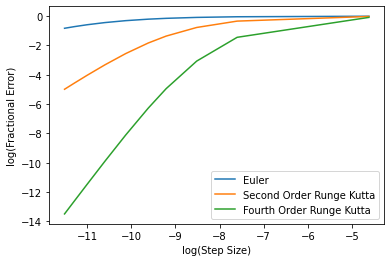

In [75]:
dt = a/(Steps+1)
print (dt)
print (e1)
print (e3)
print (e4)

plt.plot(dt,e1),label='Euler')
plt.plot(dt,e3),label='Second Order Runge Kutta')
plt.plot(dt,np.log(e4),label='Fourth Order Runge Kutta')
plt.xlabel('log(Step Size)')
plt.ylabel('log(Fractional Error)')
plt.legend()

